In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
survey_dir = 'M:\Coding Content\Datasets\Stackoverflow\Survey2020'
survey_file_name = 'survey_results_public.csv'
schema_file_name = 'survey_results_schema.csv'

In [43]:
df = pd.read_csv(f"{survey_dir}\\{survey_file_name}")

In [44]:
# "Respondent" has a unique value for each survey so we can use that as index to clean up view a bit.
pd.index_col = 'Respondent'
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

In [45]:
# Shows description of column names (the question that was asked for a column).
schema = pd.read_csv(f"{survey_dir}\\{schema_file_name}", index_col='Column')

In [46]:
# Our key so we can see which columns represent which questions.
schema.sort_index()
schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,What is your current total compensation (salar...
ConvertedComp,Salary converted to annual USD salaries using ...
Country,Where do you live?


In [47]:
# Individual filters.
income = df['ConvertedComp'].between(40000, 150000)
income_wide = df['ConvertedComp'].between(10000, 150000)
usa = df['Country'] == 'United States'
age = df['Age'].between(25, 45)

ed_options = ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
              'Some college/university study without earning a degree',
              'Primary/elementary school',
              'I never completed any formal education']

no_degree = df['EdLevel'].isin(ed_options)

# Can use a str method just with .str, and then the method after.
# NaN entries may throw an error, so we can give them a default value with na="whatever".
python = df['LanguageWorkedWith'].str.contains('Python')

df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0.5)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 100)
df['YearsCodePro'] = df['YearsCodePro'].astype(float)

# Combining filters into one with '&' operator (specific to pandas in this case).
good_money = income & usa & age & python & no_degree

# Columns I want to see.
interesting_columns = ['ConvertedComp', 
                       'Age',
                       'Country',
                       'DevType', 
                       'YearsCodePro',
                       'YearsCode',
                       'WorkWeekHrs', 
                       'LanguageWorkedWith',
                       'EdLevel',
                      ]

In [48]:
# Average between 40k to 150k a year, age 25 to 45, United States, Python, no degree.
good_money_df = df.loc[good_money, interesting_columns].sort_values('YearsCodePro')
good_money_df['ConvertedComp'].mean()

102314.42105263157

In [49]:
# Average income with less than 3 years professional experience.
low_exp = good_money_df['YearsCodePro'] < 3
good_money_df[low_exp]['ConvertedComp'].mean()

79221.42857142857

In [50]:
# Less than a year professional experience (brand new job).
low_exp = (good_money_df['YearsCodePro'] < 1)
good_money_df[low_exp]['ConvertedComp'].mean()

75500.0

In [51]:
# 40k to 150k a year, age 25 to 45, United States, Python, no degree, less than 1 year working.
good_money_df[no_degree & low_exp]

H:\Coding\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ConvertedComp,Age,Country,DevType,YearsCodePro,YearsCode,WorkWeekHrs,LanguageWorkedWith,EdLevel
36259,100000.0,25.0,United States,Data scientist or machine learning specialist,0.5,4,40.0,Python,Some college/university study without earning ...
5379,96000.0,26.0,United States,"Developer, full-stack",0.5,4,40.0,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Some college/university study without earning ...
44641,95000.0,30.0,United States,"Data or business analyst;Developer, back-end",0.5,25,40.0,Bash/Shell/PowerShell;JavaScript;Python;SQL,Some college/university study without earning ...
50246,57500.0,25.0,United States,"Developer, front-end;Developer, full-stack",0.5,5,40.0,HTML/CSS;JavaScript;Python,Some college/university study without earning ...
50731,75000.0,32.0,United States,"Developer, mobile",0.5,4,38.0,JavaScript;Objective-C;Python;Swift,Some college/university study without earning ...
59282,105000.0,27.0,United States,"DevOps specialist;Engineer, site reliability;S...",0.5,5,45.0,Bash/Shell/PowerShell;Python,Some college/university study without earning ...
39750,45000.0,26.0,United States,"Data or business analyst;Developer, desktop or...",0.5,1,42.0,HTML/CSS;Python;Rust;SQL;TypeScript;VBA,"Secondary school (e.g. American high school, G..."
3360,80000.0,31.0,United States,"Developer, full-stack",0.5,3,50.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,"Secondary school (e.g. American high school, G..."
19661,65000.0,30.0,United States,"Developer, full-stack",0.5,4,40.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python,Some college/university study without earning ...
1518,55000.0,45.0,United States,"Developer, full-stack",0.5,25,40.0,Go;HTML/CSS;JavaScript;Python;R;Ruby;SQL,Some college/university study without earning ...


In [52]:
# Here I'll find the average incomes of each country based on the following:
#    - Countries with 25 or more surveys taken.
#    - Between $10k to $150k annual USD converted income.
#    - Age 25 to 45.
#    - Python mentioned.
#    - No college degree.

# New combined filter.
global_money_filter = income_wide & age & python & no_degree

globe_df = df[global_money_filter]
income_results = {}
countries = globe_df['Country'].unique()
amount_of_surveys = globe_df['Country'].value_counts()

for country in countries:
    if amount_of_surveys[country] >= 25:
        country_filter = globe_df['Country'] == country
        country_df = globe_df[country_filter]
        average_income = country_df['ConvertedComp'].mean()
        # Add result to our new dictionary.
        income_results[country] = average_income

income = pd.Series(income_results, name='Income averages')
income.index.name = 'Country'
income.sort_values(inplace=True, ascending=False)
income

Country
United States     100103.265306
United Kingdom     71995.904110
Sweden             68489.685714
Canada             67817.880952
Germany            55816.582418
Netherlands        55214.633333
Spain              44835.117647
Italy              41535.975000
Poland             35367.555556
Brazil             25300.000000
Name: Income averages, dtype: float64

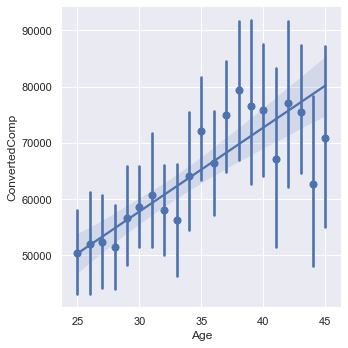

In [60]:
# Let's use a linear regression graph to see if there's any obvious relationship between 
# age and compensation (spoiler, there is).
# Note these are results between 25-45 years old, no college degree, with mentions of Python (globe_df).
sns.set(color_codes=True)
sns.lmplot(x="Age", y="ConvertedComp", data=globe_df, x_estimator=np.mean)

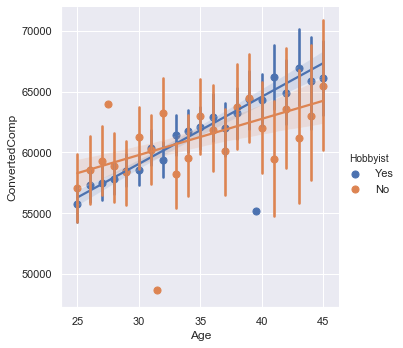

In [83]:
# Let's cast a wider net for all educations and all language combos, all countries.
# We'll limit to 100k to get rid of some outliers.
income_range = df['ConvertedComp'].between(30000, 100000)
wider_filter = income_range & age
wider_df = df[wider_filter]
sns.lmplot(x="Age", y="ConvertedComp", data=wider_df, x_estimator=np.mean, hue='Hobbyist')
# The global average seems to be between 50k up towards 75k or so as you go up in age, however..

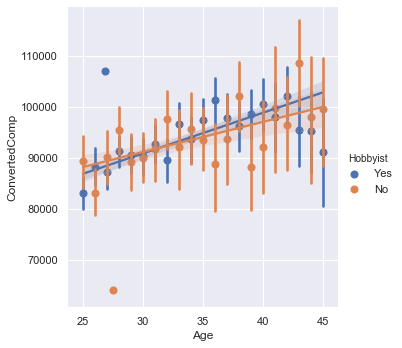

In [86]:
# In the US, the average is considerably higher!
us_income_range = df['ConvertedComp'].between(30000, 130000)
wider_filter = us_income_range & age & usa
wider_df = df[wider_filter]
sns.lmplot(x="Age", y="ConvertedComp", data=wider_df, hue='Hobbyist', x_estimator=np.mean)

In [ ]:
# Interesting that people who answered "yes" to "Do you code as a hobby?" seem to earn more as they get older.